## Introduction to PANDAS

How to read, write and visualize data with pandas?


In [1]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [2]:
import pandas as pd
nba = pd.read_csv("nba_all_elo.csv")
type(nba)

pandas.core.frame.DataFrame

In [5]:
pd.set_option("display.precision", 2)
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [4]:
nba.shape

(126314, 23)

In [8]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

### Showing Basics Statistics
Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with .describe():

In [9]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


### Exploring Your Dataset
Exploratory data analysis can help you answer questions about your dataset. For example, you can examine how often specific values occur in a column:

In [10]:
nba["team_id"].value_counts()

nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

## How to create a DF

every numpy array can be converted to a DF with definite columns

In [6]:
import numpy as np
import pandas as pd


test0 = np.zeros((20,1))
test1 = np.ones((20,1))
test2 = np.ones((20,1))*2


newarr = np.hstack((test0, test1, test2))

##  This is (20, 3) array


mydf = pd.DataFrame(newarr, columns=["col1", "col2", "col3"])



In [7]:
mydf

,col1,col2,col3
0,0.0,1.0,2.0
1,0.0,1.0,2.0
2,0.0,1.0,2.0
3,0.0,1.0,2.0
4,0.0,1.0,2.0
5,0.0,1.0,2.0
6,0.0,1.0,2.0
7,0.0,1.0,2.0
8,0.0,1.0,2.0
9,0.0,1.0,2.0


In [8]:
newser = mydf["col1"]

type(newser)

pandas.core.series.Series

In [9]:
newser

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: col1, dtype: float64

<AxesSubplot:>

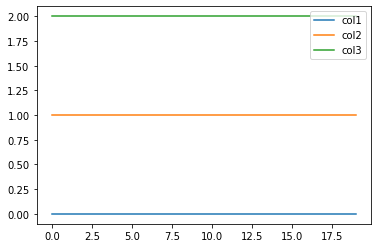

In [11]:
mydf.plot()

<AxesSubplot:>

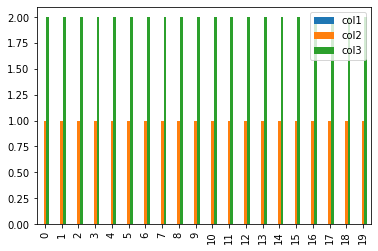

In [16]:
mydf.plot.bar()